## Tutorial #2: Visualize EEG Data

Main focus of this tutorial is visualization of eeg data. Various visualization strategies on an example dataset will be provided. Functions provided by 'viz' module of MNE package and Matplotlib library will be benefitted thoughrout this tutorial.  

In [36]:
import mne

In [38]:
#Load epoched data
data_file = '../../817_1_PDDys_ODDBALL_Clean_curated-epo'

# Read the EEG epochs:
epochs = mne.read_epochs(data_file + '.fif')

Reading ../../817_1_PDDys_ODDBALL_Clean_curated-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available
189 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


Before any attempt to visualize data with MNE package, mne.viz module should be imported.

In [39]:
import mne.viz

### 1.) Basic Plotting with MNE

The function named plot_sensors() plots the positions of sensors. The default plot kind is 'topomap' but it can be chageged if the 'kind' parameter is provided as either '3d' or 'select'. If 'select' is selected, this function will provide interactive sensor selecting dialog. By using lasso selector or clicking while holding control key, channels can be selected. If any selection is made, this function returns a list containing selected channels together with the plot.   

Topomap reprensentation of sensor positions with plot_sensors() function

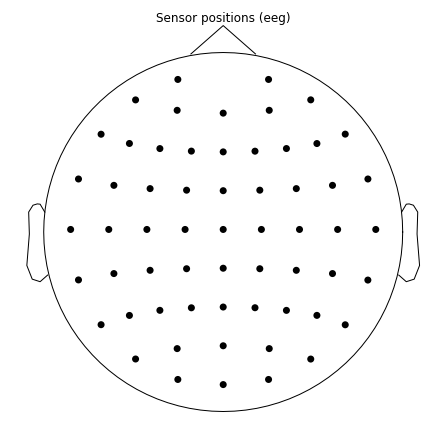

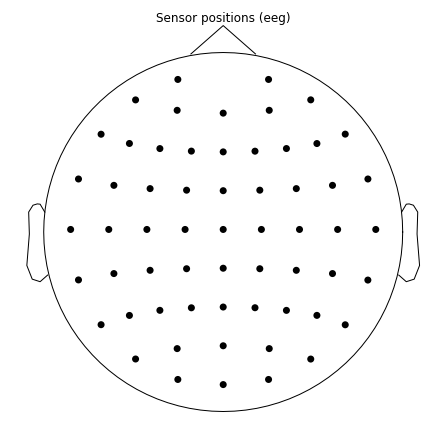

In [45]:
epochs.plot_sensors()

3D reprensentation of sensor locations with plot_sensors() function

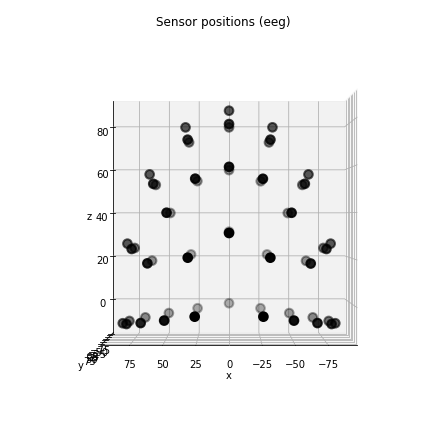

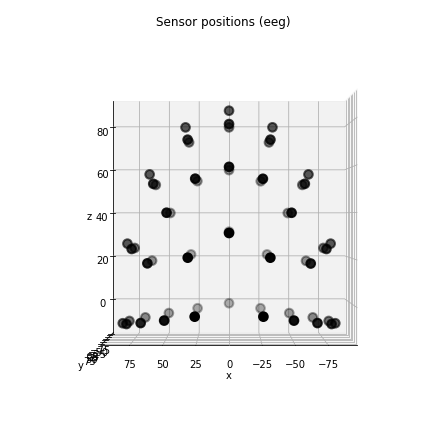

In [44]:
epochs.plot_sensors(kind='3d')

Plotting selected channels

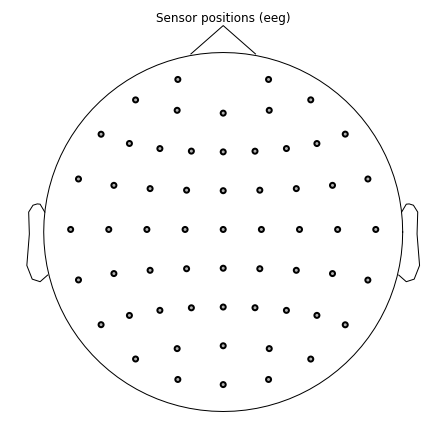

(<Figure size 432x432 with 1 Axes>, [])

In [59]:
epochs.plot_sensors(kind='select') # I couldn't manage to make it work interactively.

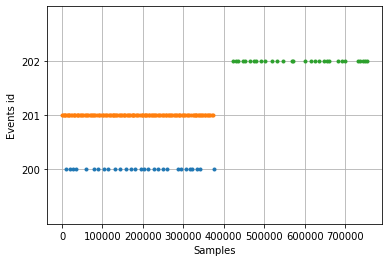

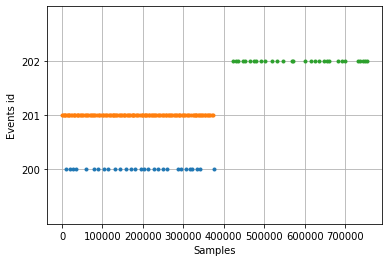

In [60]:
# Plotting rough timings for all event ids
all_events = epochs.events
mne.viz.plot_events(all_events)

If a specific event or a list of events is wanted to be plotted, it should be done after selecting them by pick_events() function. It returns a list of events and this list can be passed to plot_events() function as a parameter. Note that, time is given in terms of samples not seconds. 

{'Standard': 201, 'Target': 200, 'Novel': 202}
Total number of epochs in picked events: 59


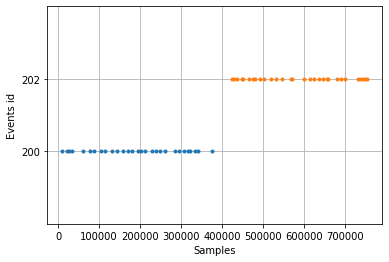

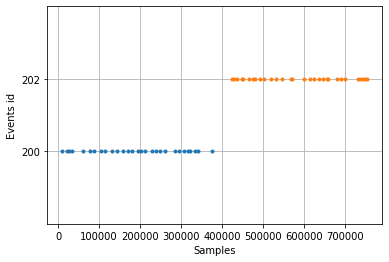

In [67]:
print(epochs.event_id)
picked_events = mne.pick_events(all_events, include=[200, 202], exclude=None)
print('Total number of epochs in picked events: ' + str(len(picked_events)))
mne.viz.plot_events(picked_events)

plot() function plots epochs as its name indicates. y axis shows channel names while x axis is showing epoch numbers. Additionally above the plot, ratio of each event types are given as a summation. For example 0.69 * Standard + 0.15 * Target + 0.16 * Novel

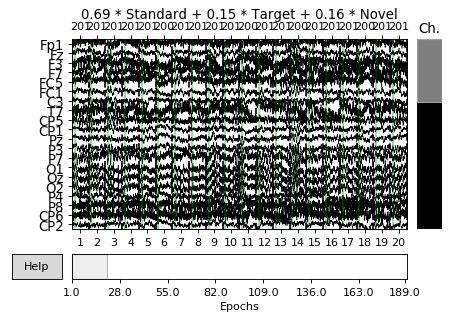

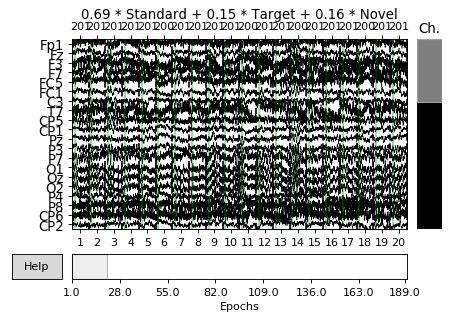

In [70]:
epochs.plot()

In [75]:
print(len(epochs['Standard'])/len(epochs))
print(len(epochs['Novel'])/len(epochs))
print(len(epochs['Target'])/len(epochs))

0.6878306878306878
0.15873015873015872
0.15343915343915343
